# Análise exploratória

## Importando as bibliotecas

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from io import StringIO





In [59]:
df = pd.read_csv('DONI_STG_GHR_VW_VIAGEM_MSTRBI_DADOS.csv', encoding='latin1')


### Primeiras 20 linhas do dataframe

In [60]:
df [:20]

,,ID_VIAGEM_REALIZADA,DT_OPERACIONAL,ID_LINHA,TX_DESCR_LINHA,TX_COR_LINHA,NR_ORDEM,TX_PREFIXO,DT_INI_VIAGEM,DT_FIM_VIAGEM,DT_ATUALIZA,...,NR_DURACAO_REAL,NR_DURACAO_PROG,TX_TP_GRAFICO,TX_TP_DIA,FL_CONSIDERAR,TX_IPPM,TX_FPPM,TX_IPPT,TX_FPPT,TX_PICO
133747423,26/02/23,3,LINHA 11 - CORAL,F55F1A,50,E158,26/02/23,26/02/23,02/09/24,72,5,...,5,NaN,G2,D,0,06:00,07:00,17:30,18:30,NaN
133747424,26/02/23,3,LINHA 11 - CORAL,F55F1A,50,E160,26/02/23,26/02/23,02/09/24,74,42,...,4167,NaN,G2,D,0,06:00,07:00,17:30,18:30,NaN
133747425,26/02/23,3,LINHA 11 - CORAL,F55F1A,50,E161,26/02/23,26/02/23,02/09/24,72,5,...,5,NaN,G2,D,0,06:00,07:00,17:30,18:30,NaN
133747426,26/02/23,3,LINHA 11 - CORAL,F55F1A,50,E162,26/02/23,26/02/23,02/09/24,77,25,...,25,NaN,G2,D,0,06:00,07:00,17:30,18:30,NaN
133747427,26/02/23,3,LINHA 11 - CORAL,F55F1A,50,E165,26/02/23,26/02/23,02/09/24,72,25,...,25,NaN,G2,D,0,06:00,07:00,17:30,18:30,NaN
133747428,26/02/23,3,LINHA 11 - CORAL,F55F1A,50,E166,26/02/23,26/02/23,02/09/24,63,8,...,0833,NaN,G2,D,0,06:00,07:00,17:30,18:30,NaN
133747429,26/02/23,3,LINHA 11 - CORAL,F55F1A,50,E167,26/02/23,26/02/23,02/09/24,67,17,...,1667,NaN,G2,D,0,06:00,07:00,17:30,18:30,NaN
133747430,26/02/23,3,LINHA 11 - CORAL,F55F1A,50,E168,26/02/23,26/02/23,02/09/24,70,64,...,G2,D,0,06:00,07:00,17:30,18:30,NaN,NaN,NaN
133747431,26/02/23,3,LINHA 11 - CORAL,F55F1A,50,E169,26/02/23,26/02/23,02/09/24,68,75,...,75,NaN,G2,D,0,06:00,07:00,17:30,18:30,NaN
133747432,26/02/23,3,LINHA 11 - CORAL,F55F1A,50,E170,26/02/23,26/02/23,02/09/24,68,64,...,G2,D,0,06:00,07:00,17:30,18:30,NaN,NaN,NaN


In [61]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 892979 entries, (133747423, '26/02/23') to (134589364, '26/08/24')
Data columns (total 35 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID_VIAGEM_REALIZADA  892979 non-null  int64  
 1   DT_OPERACIONAL       892979 non-null  object 
 2   ID_LINHA             892979 non-null  object 
 3   TX_DESCR_LINHA       892979 non-null  int64  
 4   TX_COR_LINHA         892979 non-null  object 
 5   NR_ORDEM             892979 non-null  object 
 6   TX_PREFIXO           892979 non-null  object 
 7   DT_INI_VIAGEM        892979 non-null  object 
 8   DT_FIM_VIAGEM        892979 non-null  int64  
 9   DT_ATUALIZA          892979 non-null  int64  
 10  NR_DURACAO           892979 non-null  int64  
 11  ID_ORIGEM            892979 non-null  object 
 12  ID_DESTINO           892979 non-null  object 
 13  TX_ORIGEM            892596 non-null  object 
 14  TX_DESTINO           859428 n

### Como os dados estão e como deveriam estar

|   | COLUMN_NAME          | DATA_TYPE PREVISTO | DATA_TYPE REAL |
|---|----------------------|-------------------|----------------|
| 0 | ID_VIAGEM_REALIZADA   | FLOAT             | int64          |
| 1 | DT_OPERACIONAL        | DATE              | object         |
| 2 | ID_LINHA              | NUMBER(3,0)       | object         |
| 3 | TX_DESCR_LINHA        | VARCHAR2(43 BYTE) | int64          |
| 4 | TX_COR_LINHA          | VARCHAR2(6 BYTE)  | object         |
| 5 | NR_ORDEM              | NUMBER(3,0)       | object         |
| 6 | TX_PREFIXO            | VARCHAR2(10 BYTE) | object         |
| 7 | DT_INI_VIAGEM         | DATE              | object         |
| 8 | DT_FIM_VIAGEM         | DATE              | int64          |
| 9 | DT_ATUALIZA           | DATE              | int64          |
|10 | NR_DURACAO            | FLOAT             | int64          |
|11 | ID_ORIGEM             | FLOAT             | object         |
|12 | ID_DESTINO            | FLOAT             | object         |
|13 | TX_ORIGEM             | VARCHAR2(10 BYTE) | object         |
|14 | TX_DESTINO            | VARCHAR2(10 BYTE) | object         |
|15 | TX_COMPOSICAO         | VARCHAR2(11 BYTE) | object         |
|16 | ID_ORIGEM_PROG        | NUMBER(7,0)       | object         |
|17 | TX_ORIGEM_PROG        | VARCHAR2(10 BYTE) | object         |
|18 | ID_DESTINO_PROG       | NUMBER(7,0)       | object         |
|19 | TX_DESTINO_PROG       | VARCHAR2(10 BYTE) | object         |
|20 | DT_INI_VIAGEM_PROG    | DATE              | object         |
|21 | DT_FIM_VIAGEM_PROG    | DATE              | float64        |
|22 | NR_OCORR_SIC          | NUMBER(7,0)       | float64        |
|23 | NR_CCO_SIC            | NUMBER(3,0)       | float64        |
|24 | NR_ANO_SIC            | NUMBER(7,0)       | float64        |
|25 | NR_DURACAO_REAL       | FLOAT             | object         |
|26 | NR_DURACAO_PROG       | NUMBER(7,0)       | object         |
|27 | TX_TP_GRAFICO         | VARCHAR2(3 BYTE)  | object         |
|28 | TX_TP_DIA             | VARCHAR2(3 BYTE)  | object         |
|29 | FL_CONSIDERAR         | FLOAT             | object         |
|30 | TX_IPPM               | VARCHAR2(5 BYTE)  | object         |
|31 | TX_FPPM               | VARCHAR2(5 BYTE)  | object         |
|32 | TX_IPPT               | VARCHAR2(5 BYTE)  | object         |
|33 | TX_FPPT               | VARCHAR2(5 BYTE)  | object         |
|34 | TX_PICO               | CHAR(13 BYTE)     | object         |

### Limpeza dos Dados

In [62]:
df = df.dropna(axis=1, how='all')
df = df.drop_duplicates()

num_cols = df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])



### Outliers

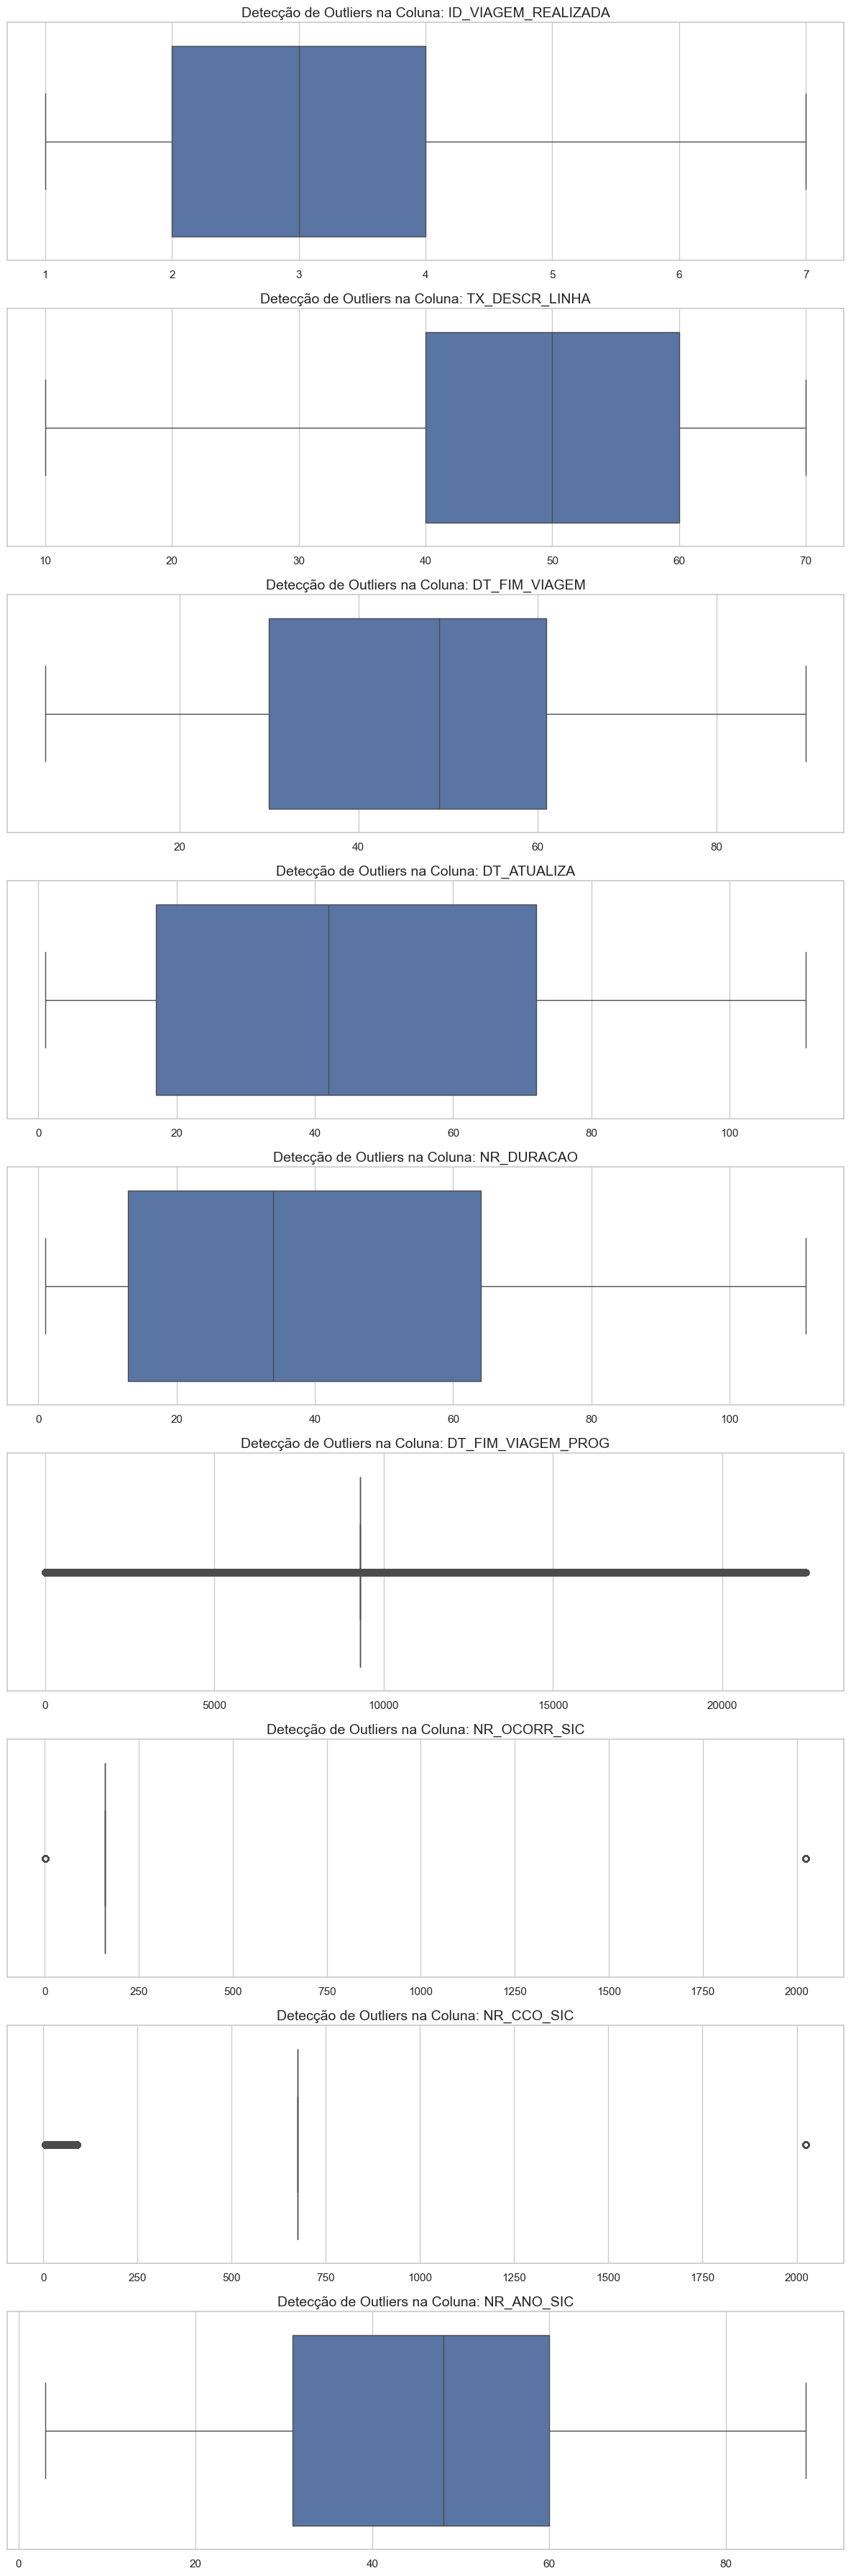

In [70]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(12, len(numeric_cols) * 4))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(data=df, x=col)
    plt.title(f'Detecção de Outliers na Coluna: {col}', fontsize=14)
    plt.xlabel('')
    plt.tight_layout()

plt.show()


### Análise Univariada

       ID_VIAGEM_REALIZADA  TX_DESCR_LINHA  DT_FIM_VIAGEM    DT_ATUALIZA  \
count        892979.000000   892979.000000  892979.000000  892979.000000   
mean              3.087303       44.530913      45.440882      44.430119   
std               1.766570       19.308626      21.060266      29.294369   
min               1.000000       10.000000       5.000000       1.000000   
25%               2.000000       40.000000      30.000000      17.000000   
50%               3.000000       50.000000      49.000000      42.000000   
75%               4.000000       60.000000      61.000000      72.000000   
max               7.000000       70.000000      90.000000     111.000000   

          NR_DURACAO  DT_FIM_VIAGEM_PROG   NR_OCORR_SIC     NR_CCO_SIC  \
count  892979.000000       892979.000000  892979.000000  892979.000000   
mean       43.706172         9299.880055     160.615943     674.084831   
std        30.505621         1188.617018     105.279587     303.591923   
min         1.00000

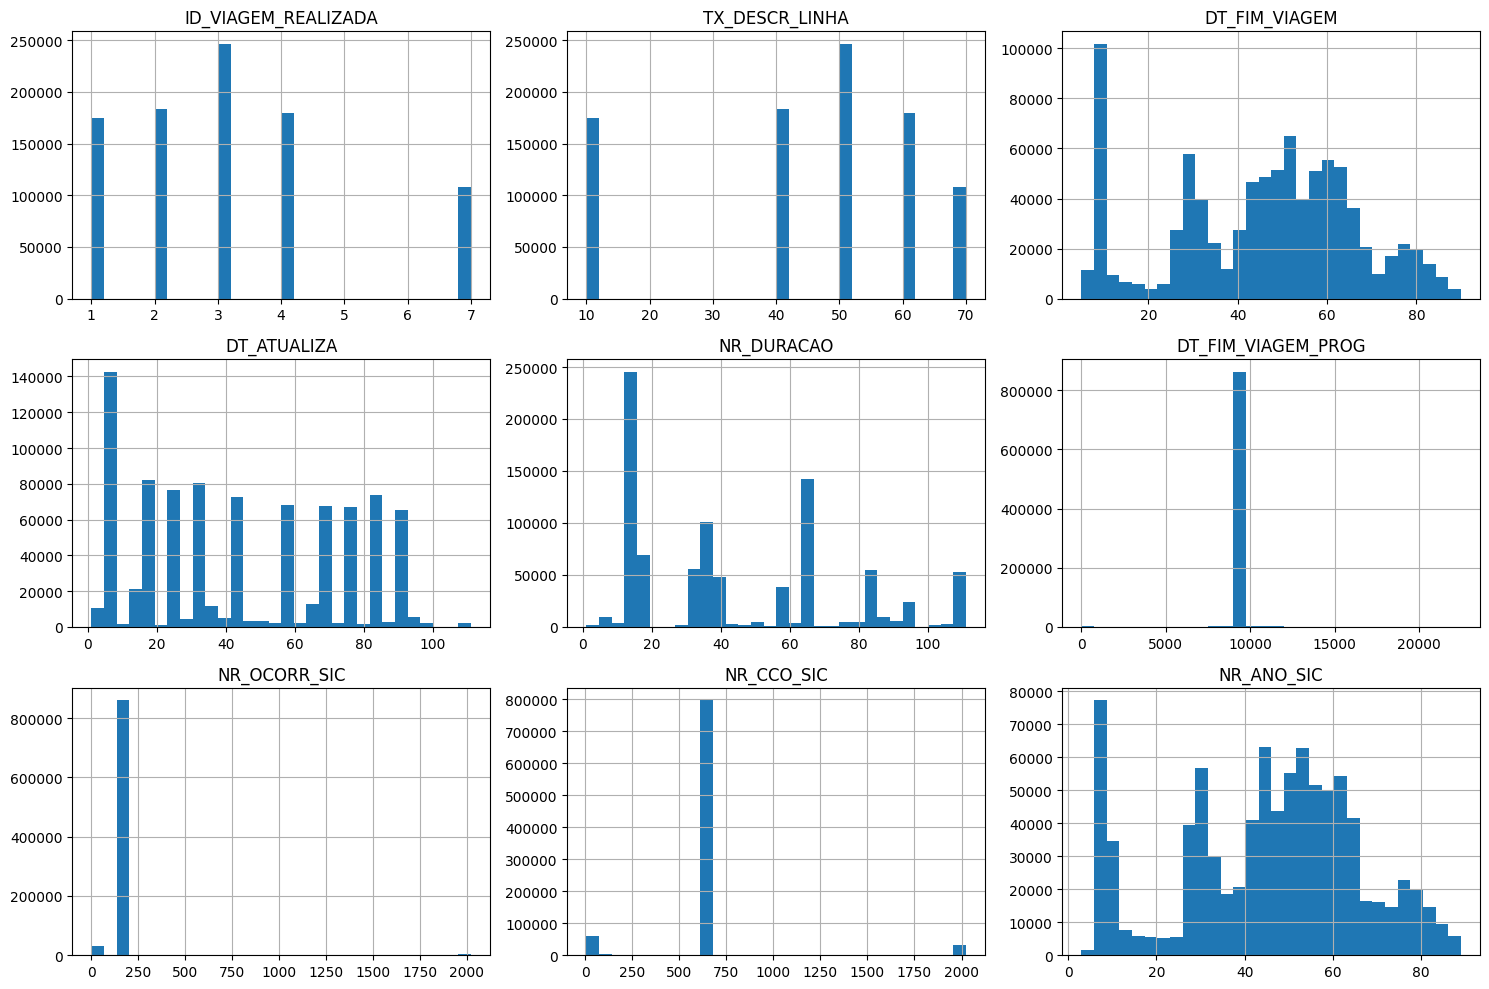

In [ ]:
print(df.describe())
df.hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()


### Análise Bivariada e Multivariada

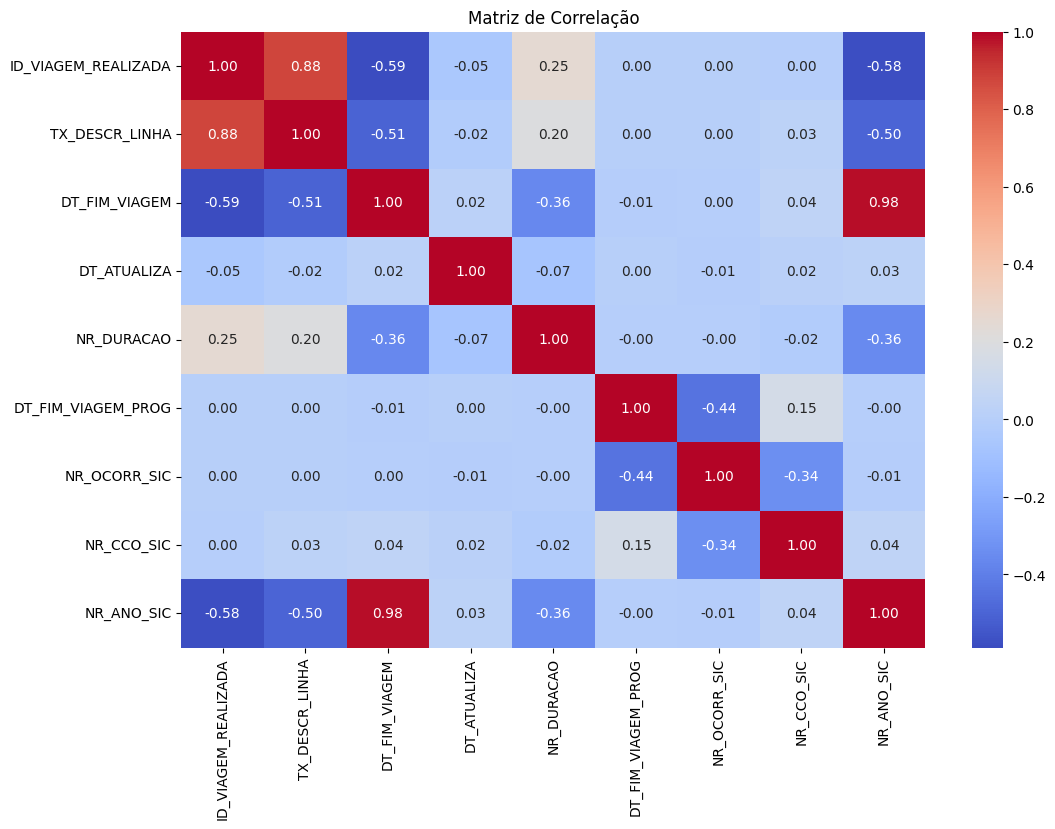

In [ ]:
numeric_df = df.select_dtypes(include=np.number)

correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()


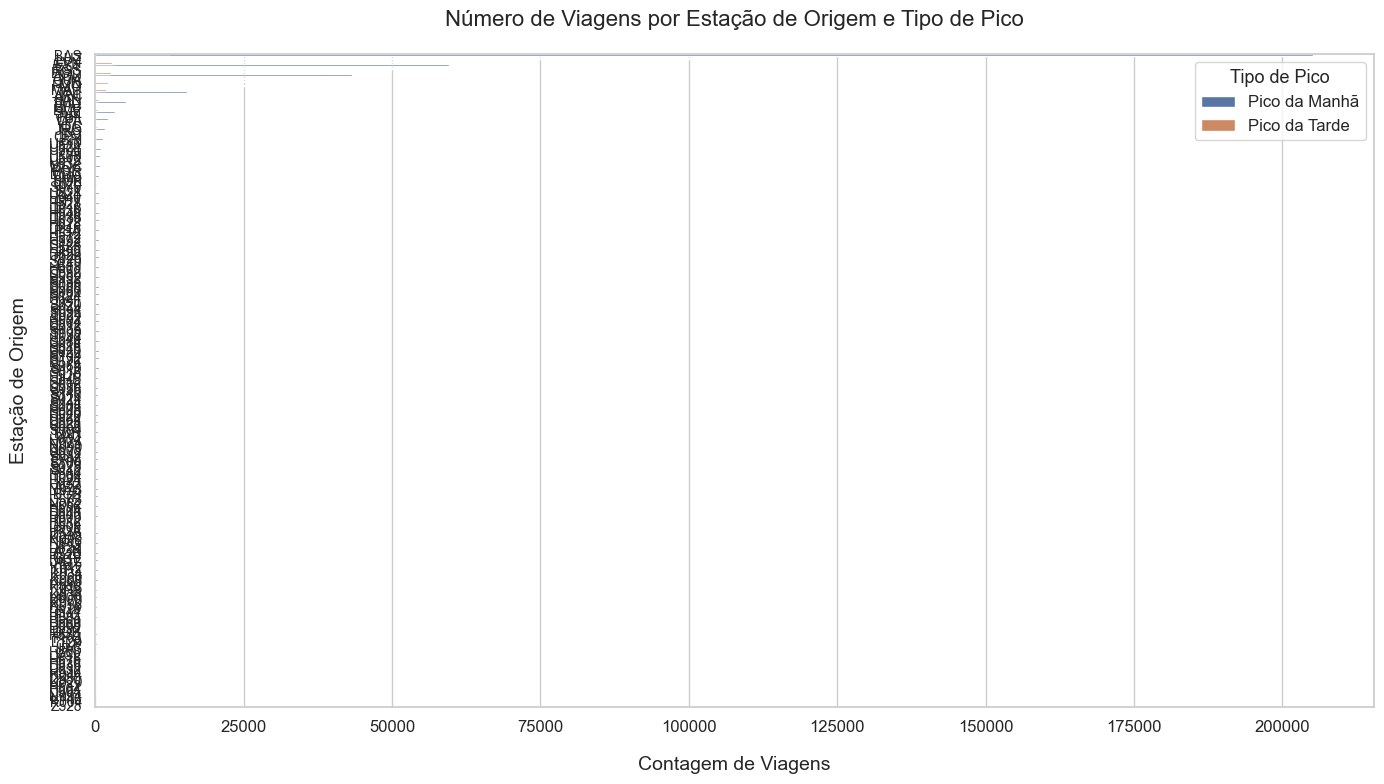

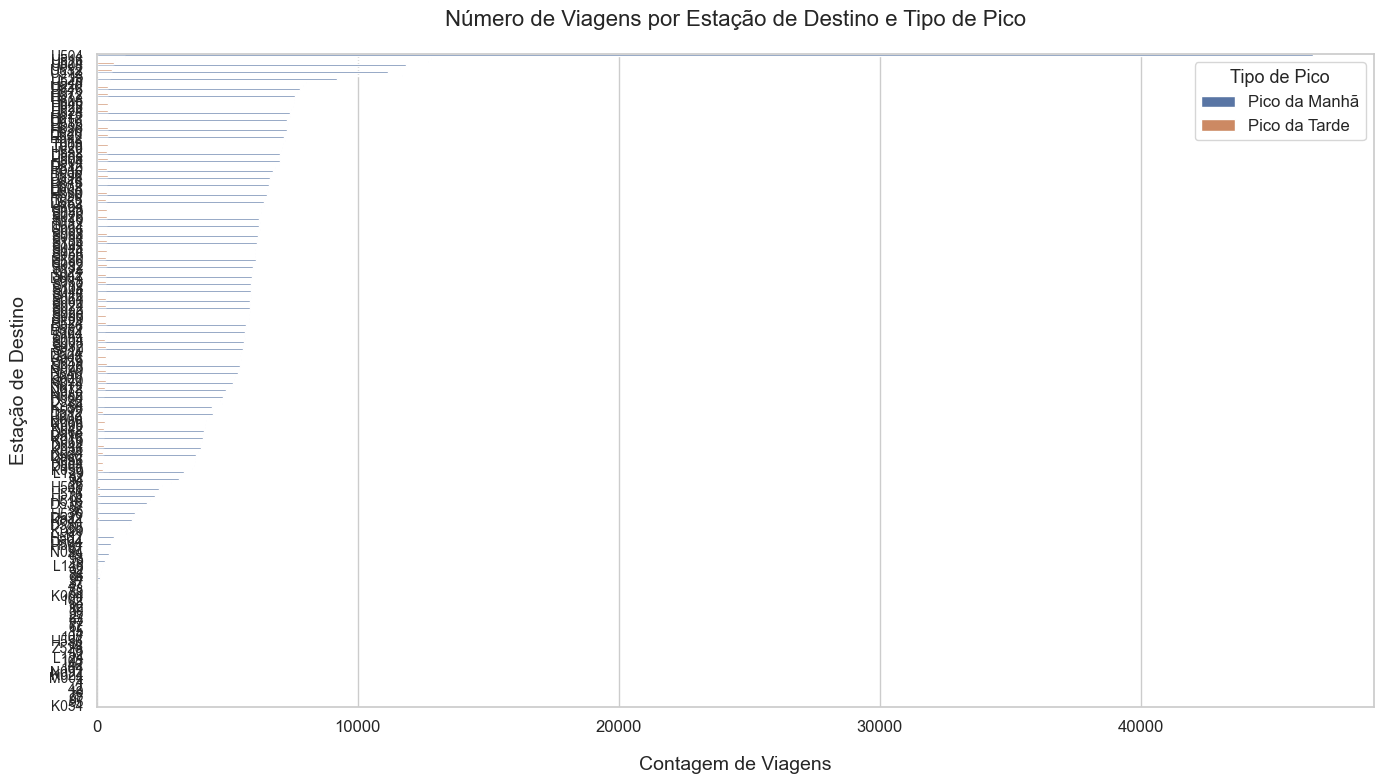

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure(figsize=(14, 8))
sns.countplot(data=df, y='TX_ORIGEM', hue='TX_PICO', order=df['TX_ORIGEM'].value_counts().index)
plt.title('Número de Viagens por Estação de Origem e Tipo de Pico', fontsize=16, pad=20)
plt.xlabel('Contagem de Viagens', fontsize=14, labelpad=15)
plt.ylabel('Estação de Origem', fontsize=14, labelpad=15)
plt.legend(title='Tipo de Pico', fontsize=12, title_fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 8))
sns.countplot(data=df, y='TX_DESTINO', hue='TX_PICO', order=df['TX_DESTINO'].value_counts().index)
plt.title('Número de Viagens por Estação de Destino e Tipo de Pico', fontsize=16, pad=20)
plt.xlabel('Contagem de Viagens', fontsize=14, labelpad=15)
plt.ylabel('Estação de Destino', fontsize=14, labelpad=15)
plt.legend(title='Tipo de Pico', fontsize=12, title_fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()





## Exportação para parquet

In [69]:
df.to_parquet('df.parquet')


## Conclusões

1. **Duração da Viagem por Tipo de Pico**: Observou-se que o tempo de viagem tende a ser maior durante os horários de pico, especialmente no Pico da Tarde. Isso sugere que o aumento de passageiros nesses horários pode impactar na eficiência do serviço.
2. **Origem e Destino das Viagens**: Analisando as estações de origem e destino, algumas estações apresentam maior volume de viagens em horários de pico, indicando que são pontos críticos de entrada e saída de passageiros. Essa informação é útil para otimizar o fluxo nas estações mais movimentadas.
3. **Comparação com Viagens Programadas**: A comparação entre duração real e duração programada mostra discrepâncias significativas nos horários de pico, o que sugere que ajustes nos horários programados podem melhorar a pontualidade do sistema.
